# Statistics

Measures of central tendency

In [12]:
ages=[23,24,32,45,12,43,67,45,32,56,32]


In [13]:
import numpy as np

In [14]:
print("Mean :",np.mean(ages))

Mean : 37.36363636363637


In [15]:
print("Median :", np.median(ages))

Median : 32.0


In [16]:
import statistics
statistics.mode(ages)
#statistics.mean(ages)
#statistics.median(ages)

32

In [17]:
#addding outliers to ages
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [18]:
np.mean(ages)  # getting huge different mean

44.25

<Axes: >

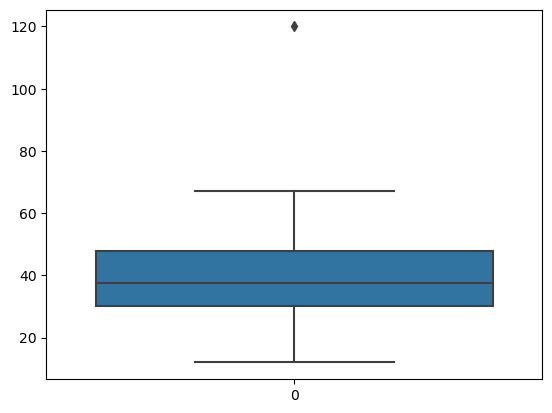

In [19]:
# finding outliers
import seaborn as sns
sns.boxplot(ages)


# 5 Number Summary

In [20]:
#finding 25% and 75% as q1 and q3

q1,q3=np.percentile(ages,[25,75])
print("1st quartile :",q1)
print("3rd quartile :",q3)

1st quartile : 30.0
3rd quartile : 47.75


In [21]:
#To check outliers[Lower fence - Higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


In [22]:
#variance using numpy(Population variance)
np.var(ages)

729.0208333333334

In [23]:
#variance using statistics(sample variance)
statistics.variance(ages)

795.2954545454545

In [24]:
#Sample variance
def variance(data):
    n=len(data)
    #mean of data 
    mean=sum(data)/n
    #variance
    deviation=[(x-mean)** 2 for x in data]
    variance=sum(deviation)/(n-1)
    return variance

In [25]:
variance(ages)

795.2954545454545

In [26]:
#dof=0 Populaiton variance
#dof=1 Sample variance


def variance(data,dof=0):
    n=len(data)
    #mean of data 
    mean=sum(data)/n
    #variance
    deviation=[(x-mean)** 2 for x in data]
    variance=sum(deviation)/(n-dof)
    return variance

In [27]:
variance(ages)

729.0208333333334

In [28]:
statistics.pvariance(ages) # population variance using statistics

729.0208333333334

In [29]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

# Histogram And PDF

<Axes: ylabel='Count'>

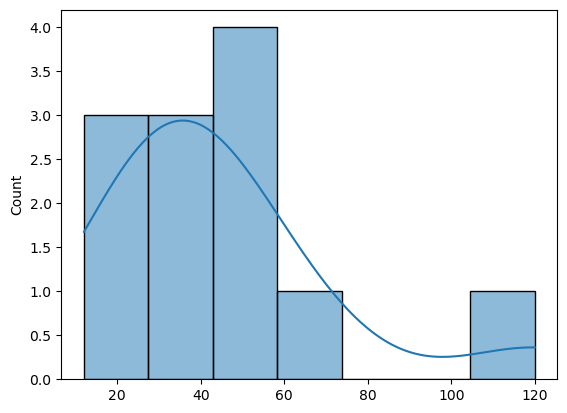

In [30]:
import seaborn as sns 
sns.histplot(ages,kde=True)  #kde=kernel density estimater

In [31]:
df=sns.load_dataset("iris")

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [ ]:
df.head()

In [32]:
#here 0.5=mean,0.2=std,1000=datapoints
s=np.random.normal(0.5,0.2,1000)
s

array([ 0.56377863,  0.48280648,  0.55473676,  0.25244395,  0.75133281,
        0.38539661,  0.70783715,  0.49104594,  0.57895509,  0.54908563,
        0.93604799,  0.54726339,  0.17546123,  0.91292029,  0.56315788,
        0.72364554,  0.89169692,  0.37842531,  0.57185856,  0.37747524,
        1.09998364,  0.36412313,  0.50799122,  0.54566726,  0.72934168,
        0.67600709,  0.40386676,  0.58925797,  0.48766269,  0.56018587,
        0.30887477,  0.37254686,  0.60190647,  0.53110351,  0.82509836,
        0.57914823,  0.43466366,  0.41356351,  0.70210004, -0.11806149,
        0.23274359,  0.51819082,  0.30233128,  0.27855304,  0.60868279,
        0.52532219,  0.31469188,  0.54749314,  0.40565067,  0.72354931,
        0.54109198,  0.56384091,  0.86959729,  0.79411267,  0.69753008,
        0.5137713 ,  0.57753028,  0.66208137,  0.59942596,  0.79927471,
        0.51341077,  0.2540312 ,  0.50748545,  0.47156064,  0.48799359,
        0.62755074,  0.51429876,  0.34149585,  0.28636243,  0.44

LogNormal dstribution

In [45]:
mu,sigma=3.,1. #mean and std
s=np.random.lognormal(mu,sigma,1000)
s

array([ 27.50780742,   5.53223993,  22.36211938,  51.46592408,
        56.33223863,  21.425702  ,  16.32474537,  57.84126817,
         8.88686963,  80.91891864,  39.51222388,  13.48081317,
         8.33626888,  69.13189735,  43.30191855,   2.19768754,
        23.83430932,  19.77981004,  28.05712953,  12.07937549,
         6.74587517,  78.13821036,  93.99780024,  20.29385616,
         2.68922302,  27.94099393,  18.97687534,   9.40826955,
        32.01092315,  68.36830348,   9.37836119,  47.5924101 ,
        58.1767682 ,  62.67923223,  37.74874283,   8.45091783,
        15.30217534,  11.4903699 ,  16.62230583,  22.42481164,
         9.61550019,  20.59605556,  23.96781687,  14.55949715,
        64.07585944,  12.75291135,   5.24621212, 225.86808561,
        36.40469956,  68.01593975,   9.46100373,  42.62807593,
         5.18534505, 102.64966006,  71.11724556,  21.12001766,
        17.40229037,   8.52962933,  16.745471  ,   7.40627854,
        20.9299464 ,  28.95689653,  28.03468083,  17.07

<Axes: ylabel='Count'>

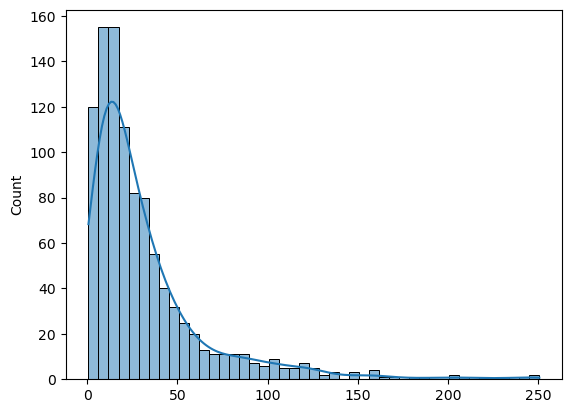

In [38]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

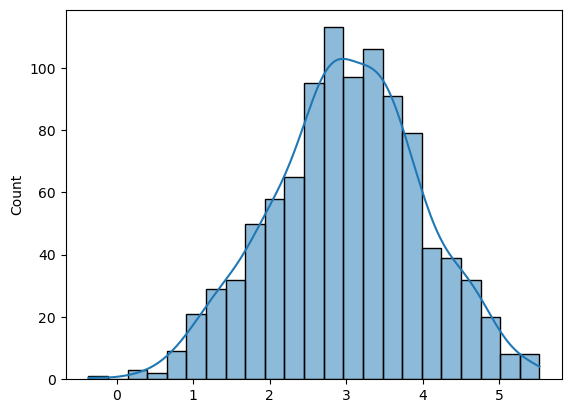

In [40]:
#convert it to normal distibution
sns.histplot(np.log(s),kde=True)

In [61]:
## check if the distribution is normal or not 
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist="norm",plot=pylab)
    plt.show()

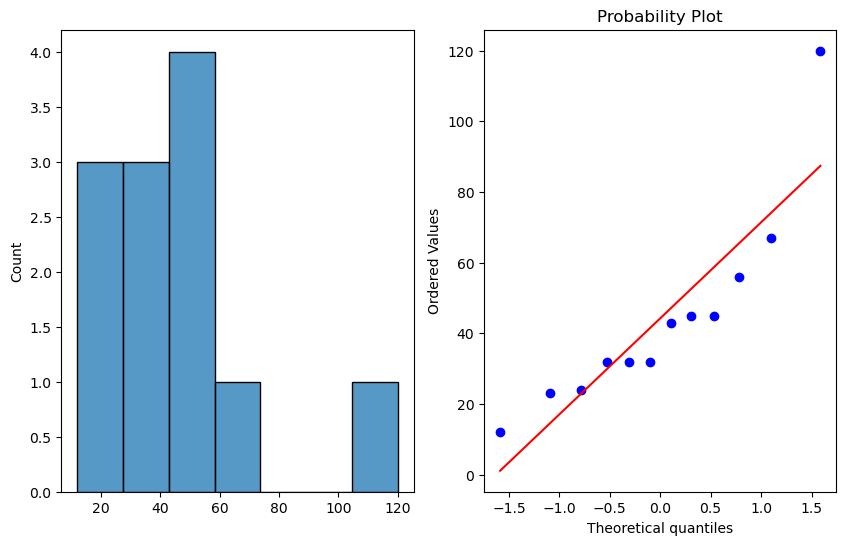

In [62]:
plot_data(ages)

In [64]:
#testing normal dustribustion of log normal data
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist="norm",plot=pylab)
    plt.show()

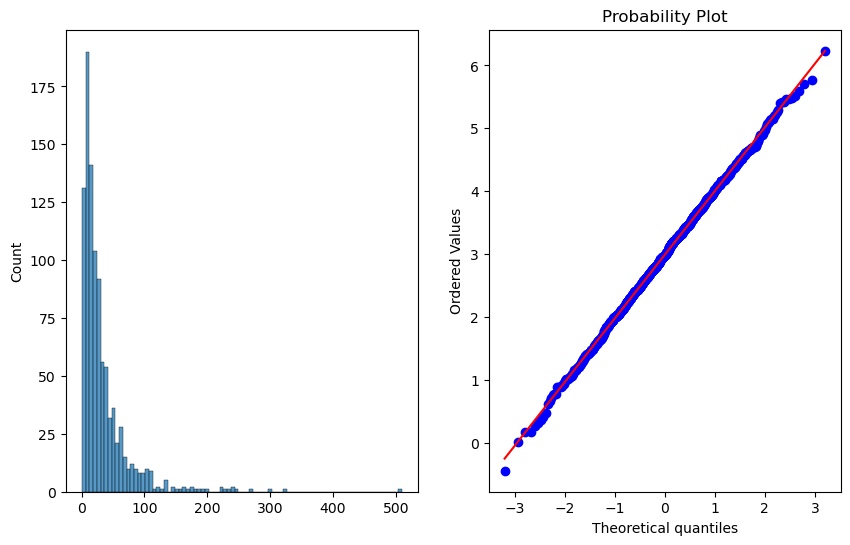

In [65]:
plot_data_log(s)